In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### SCRAPING

In [2]:
# Used to avoid detection as a bot
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", 
           "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
           "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

# The url has three parameters to be filled - one for the search year and two for the current page that is scraped
base_url = "https://www.amazon.com/gp/bestsellers/2020/books/ref=zg_bsar_pg_{}?ie=UTF8&pg={}"

no_pages = 2 # Number of pages that exists (looked before making scraping)

In [3]:
results = []

for page in range(1, no_pages+1):
    res = requests.get(base_url.format(page, page), headers=headers)
    soup = BeautifulSoup(res.text, 'lxml')
    
    collections = soup.find_all('li', attrs={'class':'zg-item-immersion'})
    for item in collections:
        name = item.select('.a-section.a-spacing-small > img')[0]['alt']
        author = item.select('.a-size-small.a-link-child, .a-size-small.a-color-base')[0].text
        rank = item.find('span', attrs={'class':'zg-badge-text'}).text
        user_rating = item.find('span', attrs={'class':'a-icon-alt'}).text
        users_rated = item.find('a', attrs={'class':'a-size-small a-link-normal'}).text
        price = item.find('span', attrs={'class':'p13n-sc-price'}).text

        results.append((name, author, rank, user_rating, users_rated, price))

In [4]:
# create DataFrame using results 
df = pd.DataFrame(results, columns =['Name', 'Author', 'Rank', 'User_Rating', 'Users_rated', 'Price($)'])
df.head()

,Name,Author,Rank,User_Rating,Users_rated,Price($)
0,A Promised Land,Barack Obama,#1,4.9 out of 5 stars,"24,908",$19.95
1,Too Much and Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,#2,4.6 out of 5 stars,"81,872",$19.58
2,Where the Crawdads Sing,Delia Owens,#3,4.8 out of 5 stars,"123,849",$2.01
3,My First Learn to Write Workbook: Practice for...,Crystal Radke,#4,4.8 out of 5 stars,"37,076",$5.39
4,Midnight Sun,Stephenie Meyer,#5,4.8 out of 5 stars,"51,230",$13.32


### PRE-PROCESSING

In [5]:
# Convert the strings that are inherently integer
df['Rank'] = df['Rank'].str.replace('#','').astype(int)
df['User_Rating'] = df['User_Rating'].str.replace('out of 5 stars','').astype(float)
df['Users_rated'] = df['Users_rated'].str.replace(',','').astype(int)
df['Price($)'] = df['Price($)'].str.replace('$','').astype(float)

### VISUALIZATION

* Let's look at Top Rated Books and Authors with respect to the total number of customers rated

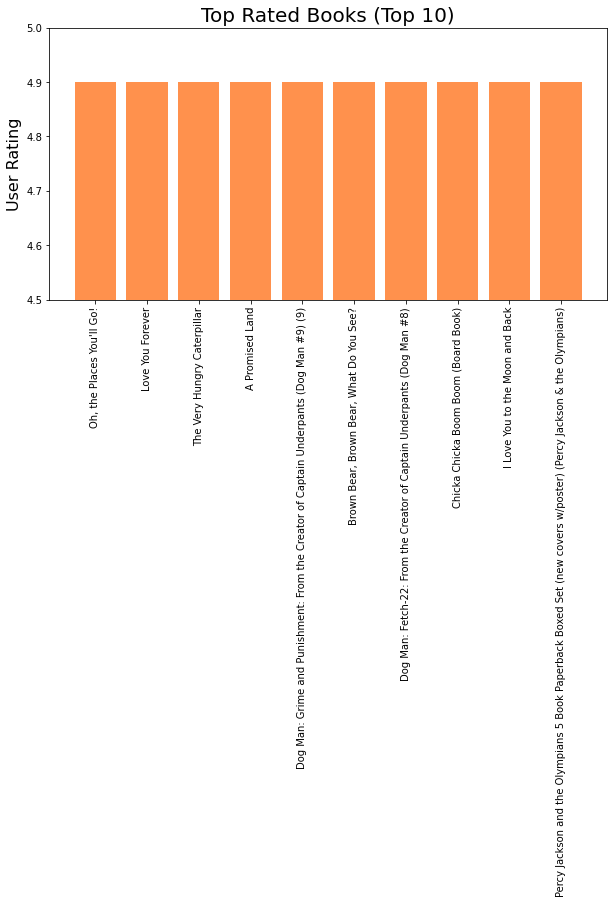

In [7]:
sorted_df = df.sort_values(by=['User_Rating','Users_rated'], ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(sorted_df.iloc[:10]['Name'], sorted_df.iloc[:10]['User_Rating'], color = "#FF914D")
#plt.xlabel('Author', fontdict={'size': 16})
plt.ylabel('User Rating', fontdict={'size': 16})
plt.title('Top Rated Books (Top 10)', fontdict={'size': 20})
plt.xticks(rotation = 90)
plt.ylim(4.5, 5)
plt.show()

* From the above graph, we can observe that the top three rated books with the highest number of customer ratings are **Oh, the Places You'll Go!, Love You Forever and The Very Hungry Caterpillar**

* Let's look at the top highest priced books and their authors

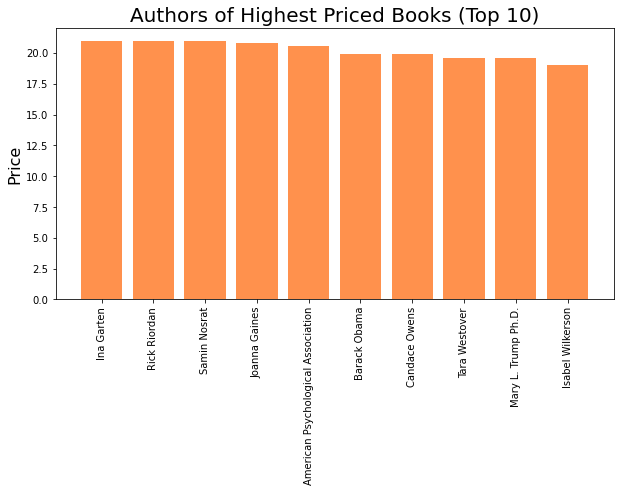

In [6]:
sorted_df = df.sort_values(by='Price($)', ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(sorted_df.iloc[:10]['Author'], sorted_df.iloc[:10]['Price($)'], color = "#FF914D")
#plt.xlabel('Author', fontdict={'size': 16})
plt.ylabel('Price', fontdict={'size': 16})
plt.title('Authors of Highest Priced Books (Top 10)', fontdict={'size': 20})
plt.xticks(rotation = 90)
plt.show()

* From the above graph, we can observe that the top three highest-priced books are by the author **Ina Garten, Rick Riordan and Samin Nosrat**

### EXPORT AS EXCEL FILE

In [9]:
df.to_excel('bestseller_books_2020.xlsx', index=False, encoding='utf-8')